<a href="https://colab.research.google.com/github/bforoura/IDS/blob/main/linear_regression_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supervised Learning: Linear Regression**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Company_data contains mounts spent on different types of advertisements and the resulting Sales
companyDF = pd.read_csv('https://raw.githubusercontent.com/bforoura/AML/master/Company_data.csv')



In [ ]:
#pd.set_option('display.max_rows', None)

companyDF.head(10)




,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [ ]:
companyDF.describe()




,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## **Examine Correlations**



In [ ]:
# Let’s compute the standard correlation coefficient (Pearson’s r) between pairs of attributes
# to determine which parameter has the greatest correlation with Sales

corr_matrix = companyDF.corr()

corr_matrix["Sales"].sort_values(ascending=False)



Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64

## **Examine Features with Boxplots**

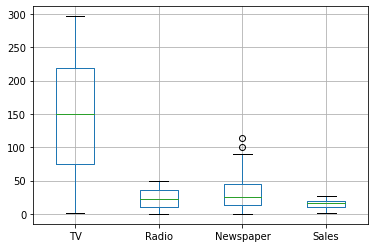

In [ ]:
companyDF.boxplot()



## **Examine Feature Distributions**



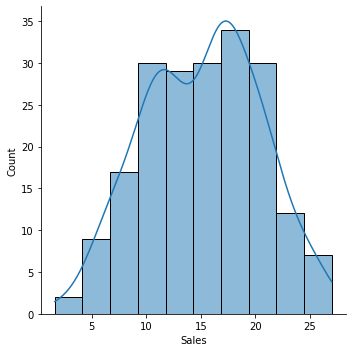

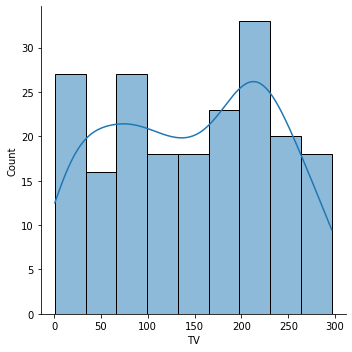

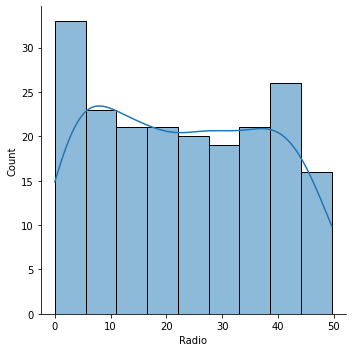

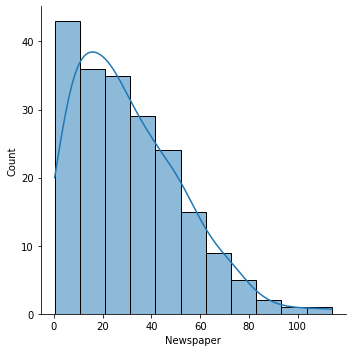

In [ ]:
# plotting histogram and  kernel density estimates 
sns.displot(data=companyDF, x="Sales", kde=True)
 
sns.displot(data=companyDF, x="TV", kde=True) 

sns.displot(data=companyDF, x="Radio", kde=True) 

sns.displot(data=companyDF, x="Newspaper", kde=True) 




## **Check for Missing Values**

* Determine if there are any missing values
* If so, decide on the method of imputation, e.g., mean, median, most_frequent



In [ ]:
companyDF.isnull().sum()




TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## **Bulid the Linear Regression Model**

* y = f(x), where

> y (dependent parameter) = Sales

> x (independent parameter) = TV, Radio, or NewsPaper






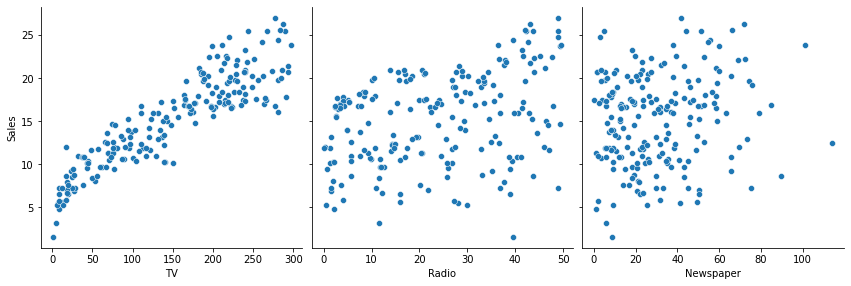

In [ ]:
# Here the target variable is the Sales column

sns.pairplot(companyDF, x_vars=['TV', 'Radio','Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')

plt.show()




## **Use the Entire Data Set for Training**

In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# create the model
lm1 = linear_model.LinearRegression()


# reshape arrays; -1 means we don't specify #rows
x = companyDF['TV'].values.reshape(-1,1)
y = companyDF['Sales'].values.reshape(-1,1)


# Fit the model using .fit() method
lm1.fit(x, y)

# intercept and slope values
print("Intercept :", lm1.intercept_)
print('Slope :', lm1.coef_)



Intercept : [6.97482149]
Slope : [[0.05546477]]


In [ ]:
# Let's make predictions on the data and evaluate the model using the R² and MSE values
'''
R2 is a statistic that will give some information about the goodness of fit of a model. 
In regression, the R2 coefficient of determination is a statistical measure of how well 
the regression predictions approximate the real data points. An R2 of 1 indicates that 
the regression predictions perfectly fit the data.
'''
from sklearn.metrics import r2_score, mean_squared_error

# make predictions using the entire data set
y_pred = lm1.predict(x)


print('R2 score:',            r2_score(y, y_pred))
print('Mean squared error:', mean_squared_error(y, y_pred))




R2 score: 0.8121757029987414
Mean squared error: 5.2177438977951285


### **Linear Model**:   Sales = 6.97 + 0.05 * TV

## **Split the Data into Training and Test Cases**

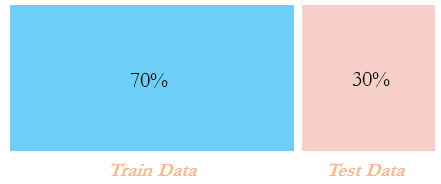

In [ ]:
# Let's experiment again, but this time split the data into training and testing sets

# random_state controls the shuffling of input data and allows us to reproduce the 
# same results each time

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, 
                                                          test_size = 0.3, 
                                                          random_state = 100)



In [ ]:
# 70% of 200 cases are used for training now
x_train.shape



(140, 1)

In [ ]:
# 30% of 200 cases are set aside for testing
x_test.shape



(60, 1)

In [ ]:
# create the model
lm2 = linear_model.LinearRegression()

# fit a new model on the reduced training data
lm2.fit(x_train, y_train)

print("Intercept :", lm2.intercept_)
print('Slope :', lm2.coef_)




Intercept : [6.9486832]
Slope : [[0.05454575]]


## **Linear Model:** Sales = 6.95 + 0.05 * TV


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# make predictions using the testing set
y_test_pred = lm2.predict(x_test)


print('R2 score:',            r2_score(y_test, y_test_pred))
print('Mean squared error:', mean_squared_error(y_test, y_test_pred))




R2 score: 0.7921031601245662
Mean squared error: 4.077556371826948


## **Summary**

* Model trained and tested on the entire data set of 200 cases: 
> **Sales = 6.97 + 0.05 * TV**    

* Model trained on 70% of the data and tested on 30% of the data: 
> **Sales = 6.95 + 0.05 * TV**







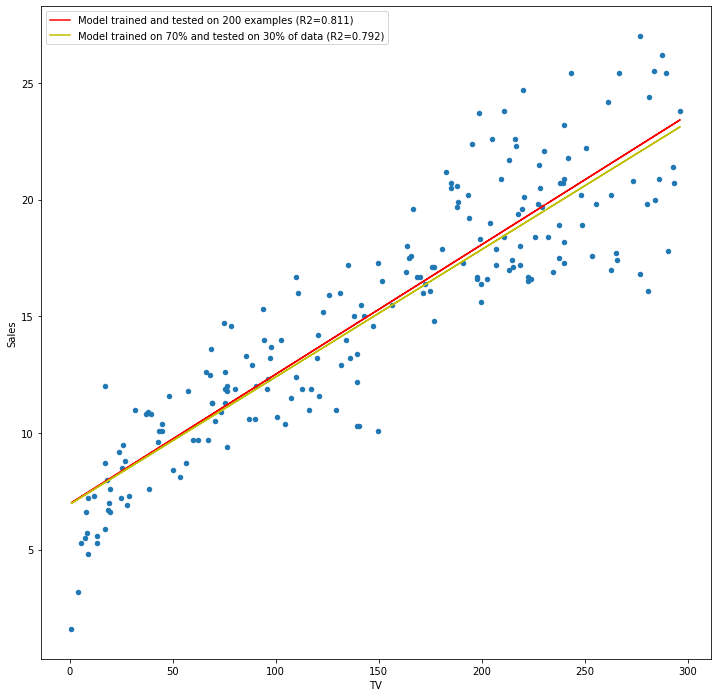

In [ ]:
# plot the best fit linear models
companyDF.plot(kind='scatter', x='TV', y='Sales', figsize=(12, 12))


plt.plot(x, lm1.intercept_ + lm1.coef_*x, "r", label="Model trained and tested on 200 examples (R2=0.811)")
plt.plot(x, lm2.intercept_ + lm2.coef_*x, "y", label="Model trained on 70% and tested on 30% of data (R2=0.792)")

plt.legend(loc="upper left")
plt.show()


# **Resources**
* https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols
* https://towardsdatascience.com/simple-linear-regression-model-using-python-machine-learning-eab7924d18b4



